## automatic emittance meas

In [1]:
# optionally add scripts location to path
if True:
    import sys
    sys.path.append("../../../")
    sys.path.append("../../")

run_dir = "/home/physics3/ml_tuning/20230902_LCLS_Injector"
print(sys.path)

import warnings
warnings.simplefilter("ignore")

import os
os.environ["OMP_NUM_THREADS"] = str(6)

['/home/physics3/rroussel/SLAC_Xopt/lcls/emittance/automatic_emittance', '/usr/local/lcls/tools/python/toolbox', '/usr/local/lcls/package/anaconda/envs/rhel7_devel/lib/python39.zip', '/usr/local/lcls/package/anaconda/envs/rhel7_devel/lib/python3.9', '/usr/local/lcls/package/anaconda/envs/rhel7_devel/lib/python3.9/lib-dynload', '', '/home/physics3/.local/lib/python3.9/site-packages', '/usr/local/lcls/package/anaconda/envs/rhel7_devel/lib/python3.9/site-packages', '../../../', '../../']


In [2]:
from scripts.image import ImageDiagnostic
import yaml

fname = "../../OTR3_config.yml"
image_diagnostic = ImageDiagnostic.parse_obj(yaml.safe_load(open(fname)))
image_diagnostic.save_image_location = run_dir
image_diagnostic.n_fitting_restarts = 1
image_diagnostic.visualize = False
image_diagnostic.threshold = 10
image_diagnostic.background_file = "OTRS_IN20_621_background.npy"
image_diagnostic.wait_time = 0.25
image_diagnostic.min_log_intensity = 4.4
print(image_diagnostic.yaml())

{screen_name: 'OTRS:IN20:621', array_data_suffix: IMAGE, array_n_cols_suffix: ROI_XNP,
  array_n_rows_suffix: ROI_YNP, resolution_suffix: RESOLUTION, resolution: 1.0, beam_shutter_pv: 'IOC:BSY0:MP01:MSHUTCTL',
  background_file: OTRS_IN20_621_background.npy, save_image_location: /home/physics3/ml_tuning/20230902_LCLS_Injector,
  roi: null, min_log_intensity: 4.4, bounding_box_half_width: 3.0, wait_time: 0.25,
  n_fitting_restarts: 1, visualize: false, return_statistics: false, threshold: 10,
  testing: false}



In [3]:
import matplotlib.pyplot as plt
#plt.imshow(image_diagnostic.measure_background())

In [4]:
import numpy as np
np.log10(image_diagnostic.background_image.sum())

5.989490308399841

fitting image


{'Cx': 206.16758829211076,
 'Cy': 133.22090744707347,
 'Sx': 95.1155944457741,
 'Sy': 93.2856676326192,
 'bb_penalty': -26.07865402200939,
 'total_intensity': 36741.0,
 'log10_total_intensity': 4.5651509725623765}

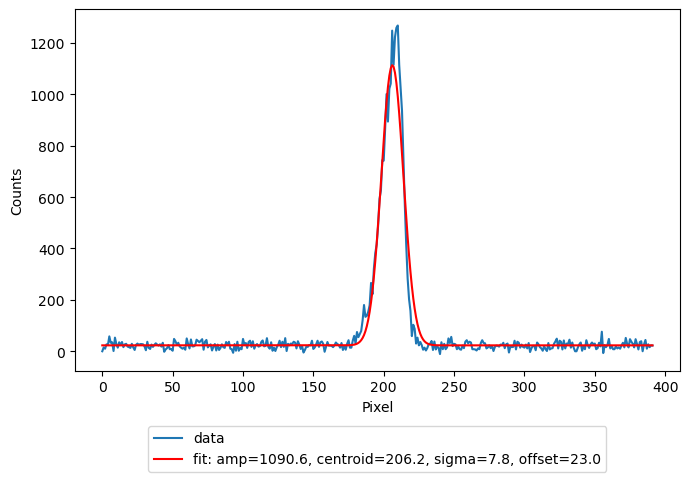

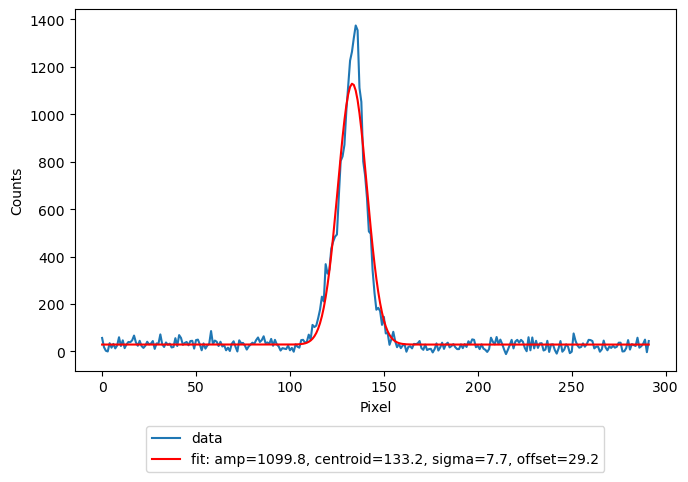

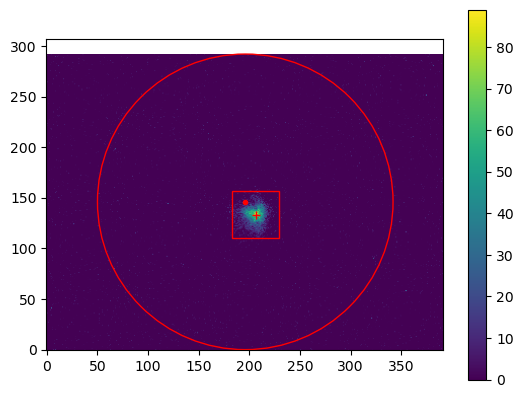

In [5]:
image_diagnostic.test_measurement()

In [6]:
from scripts.screen_auto_emittance import ScreenEmittanceMeasurement, BeamlineConfig

drift_length = 4.17
beamline_config = BeamlineConfig(
    scan_quad_pv="QUAD:IN20:525:BCTRL",
    scan_quad_range=[-7.0, -1.0],
    scan_quad_length=0.1068,
    transport_matrix_x =[[1.0,    drift_length],
        [ 0.0,    1.0]],
    transport_matrix_y = [[1.0,    drift_length],
        [ 0.0,    1.0]],
    beam_energy=0.135,
    design_beta_x = 4.68280051,
    design_beta_y = 4.68872767,
    design_alpha_x = -1.79636538,
    design_alpha_y = -1.79814306
)


measurement = ScreenEmittanceMeasurement(
    image_diagnostic=image_diagnostic,
    beamline_config=beamline_config,
    run_dir=run_dir,
    wait_time=3.0,
    n_shots=5,
    n_iterations=5,
    visualize=1,
    turbo_length=1.0
)

measurement.dump_yaml()

In [7]:
measurement.x_measurement_vocs

VOCS(variables={'QUAD:IN20:525:BCTRL': [-7.0, -1.0]}, constraints={'bb_penalty': ['LESS_THAN', 0.0], 'log10_total_intensity': ['GREATER_THAN', 4.4]}, objectives={'S_x_mm': 'MINIMIZE'}, constants={}, observables=['S_x_mm', 'S_y_mm'])

## Test quick scan

In [8]:
#fast_scan_results = measurement.fast_scan()

In [9]:
#fast_scan_results

In [10]:
#fast_scan_results.plot.scatter(x="QUAD:IN20:525:BCTRL", y="Sx")
#fast_scan_results.plot.scatter(x="QUAD:IN20:525:BCTRL", y="Sy")

getting initial points to measure
getting initial data
CAPUT QUAD:IN20:525:BCTRL -7.0
CAPUT QUAD:IN20:525:BCTRL -7.0
log10 image intensity 4.259426626587052 below threshold
log10 image intensity 4.276093991759217 below threshold
log10 image intensity 4.276093991759217 below threshold
CAPUT QUAD:IN20:525:BCTRL -5.5
log10 image intensity 4.247187390586354 below threshold
fitting image
fitting image
CAPUT QUAD:IN20:525:BCTRL -4.0
fitting image
fitting image
fitting image
CAPUT QUAD:IN20:525:BCTRL -2.5
fitting image
fitting image
fitting image
CAPUT QUAD:IN20:525:BCTRL -1.0
fitting image
log10 image intensity 4.317415586331099 below threshold
log10 image intensity 4.317415586331099 below threshold
initial data gathering took: 14.872786153107882 s
sampling points for x emittance
CAPUT QUAD:IN20:525:BCTRL -4.545455455780029
fitting image
fitting image
fitting image
fitting image
fitting image
CAPUT QUAD:IN20:525:BCTRL -3.1818251609802246
fitting image
fitting image
fitting image
fitting imag

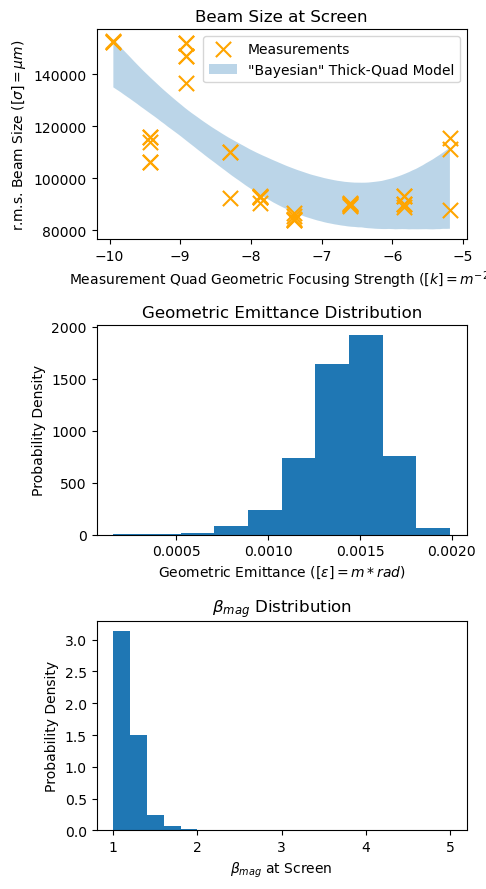

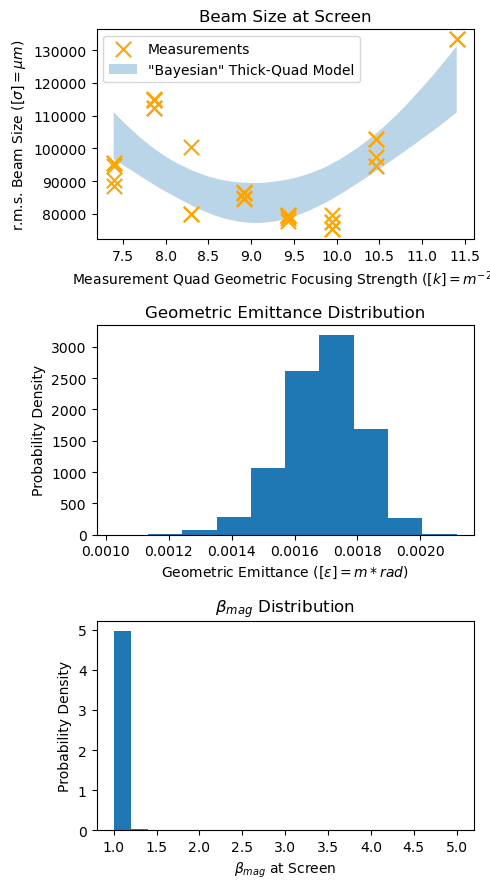

In [11]:
import time
start = time.time()
results, emit_x = measurement.run()
print(time.time() - start)

In [12]:
results

{'x_emittance': 0.380494743096761,
 'x_emittance_05': 0.2737685453366891,
 'x_emittance_95': 0.4539463905791446,
 'x_emittance_var': 0.003108333572971978,
 'bmag_x_median': 1.1666672974063728,
 'y_emittance': 0.4483347187076142,
 'y_emittance_05': 0.3905970104697436,
 'y_emittance_95': 0.49440444573602405,
 'y_emittance_var': 0.0010325332099488792,
 'bmag_y_median': 1.0342167085018816}

In [13]:
measurement.dump_file

'/home/physics3/ml_tuning/20230902_LCLS_Injector/emittance_characterize_1693686802.yml'

In [14]:
results["y_emittance_var"]**0.5

0.03213305478707058

<Axes: >

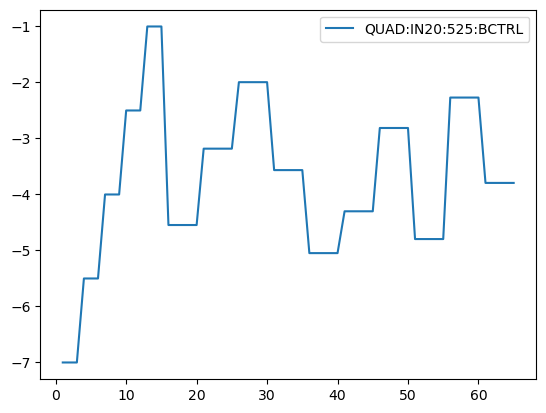

In [15]:
emit_x.data.plot(y="QUAD:IN20:525:BCTRL")

<Axes: xlabel='QUAD:IN20:525:BCTRL', ylabel='S_x_mm'>

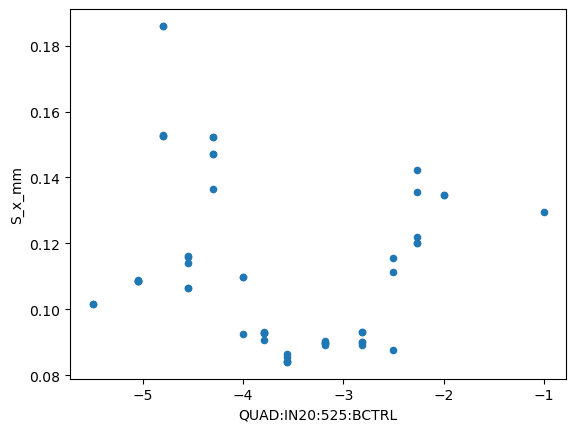

In [16]:
emit_x.data.plot.scatter(x="QUAD:IN20:525:BCTRL",y="S_x_mm")

<Axes: xlabel='QUAD:IN20:525:BCTRL', ylabel='S_y_mm'>

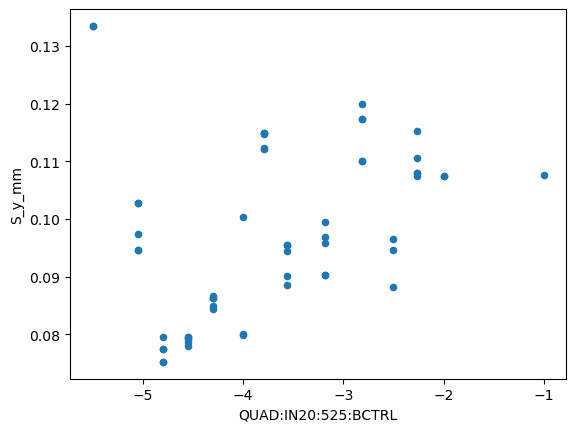

In [17]:
emit_x.data.plot.scatter(x="QUAD:IN20:525:BCTRL",y="S_y_mm")

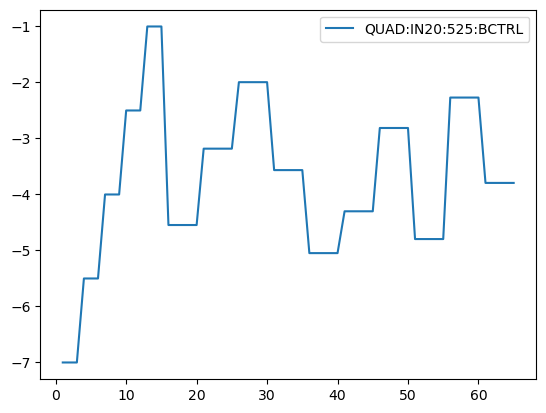

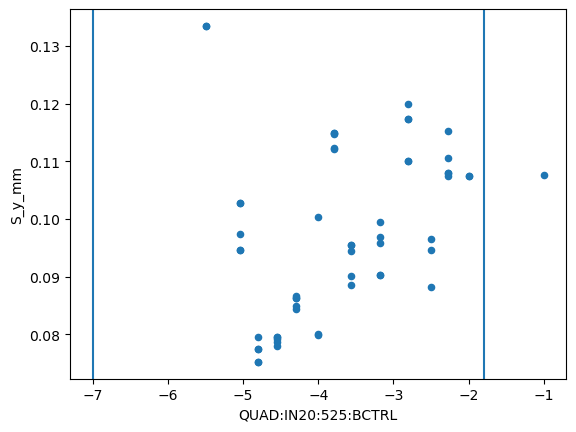

In [18]:
emit_x.data.plot(y="QUAD:IN20:525:BCTRL")
ax = emit_x.data.plot.scatter(x="QUAD:IN20:525:BCTRL", y="S_y_mm")
tr = emit_x.generator.turbo_controller.get_trust_region(
    emit_x.generator.model
).flatten()
for ele in tr:
    ax.axvline(ele)


In [19]:
from scripts.utils.visualization import visualize_step

(<Figure size 600x1000 with 5 Axes>,
 array([<Axes: ylabel='S_y_mm'>, <Axes: ylabel='bb_penalty'>,
        <Axes: ylabel='log10_total_intensity'>, <Axes: ylabel='S_x_mm'>,
        <Axes: xlabel='x', ylabel='$\\alpha(x)$'>], dtype=object))

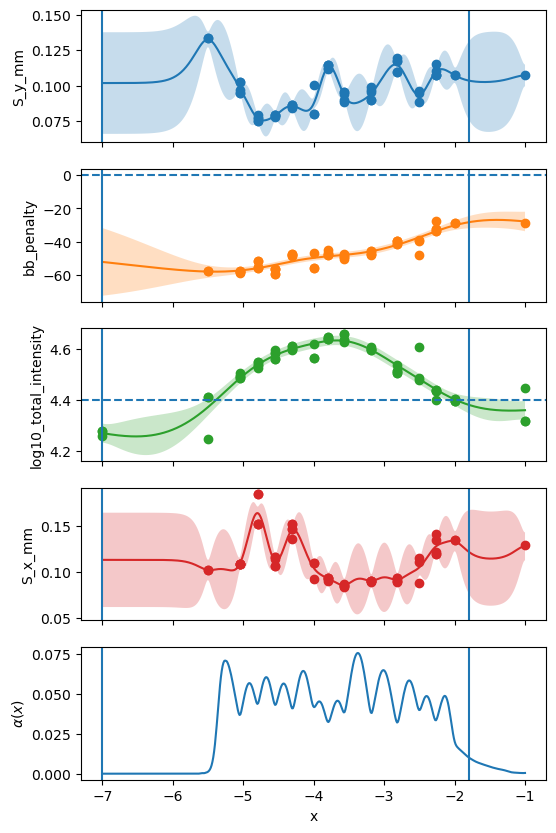

In [20]:
visualize_step(emit_x.generator)